# Import libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

# Data loading

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Dados/unified-data/full_table.csv')

In [45]:
df['variavel'].unique()

array(['Efetivo dos rebanhos', 'Quantidade produzida', 'Área plantada',
       'Área colhida', 'Área destinada à colheita',
       'Quantidade produzida na silvicultura', nan, 'Área de cobertura'],
      dtype=object)

In [59]:
def filtrar_tabela(df, filtrar_por, area, filtros:dict, limitar_ano =True):
# 	cod_municipality	regiao_intermediaria	cod_regiao_intermediaria	cod_regiao_imediata	regiao_imediata	tipo_producao	cod_variavel	variavel	produto	valor	ano
  if limitar_ano:
    df = df.loc[df['ano'] >= 1985]

  if filtrar_por == 'Pará':
    df_temp = df

  elif filtrar_por == 'imediata':
    if type(area) == list:
      df_regi = []
      for i in area:
        df_area.append(df.loc[df['regiao_imediata'] == i])
      df_temp = pd.concat(df_area)
    elif type(area) == str:
      df_temp = df.loc[df['regiao_imediata'] == area]
    
  elif filtrar_por == 'intermediaria':
    if type(area) == list:
      df_area = []
      for i in area:
        df_area.append(df.loc[df['regiao_intermediaria'] == i])
      df_temp = pd.concat(df_area)
    elif type(area) == str:
      df_temp = df.loc[df['regiao_intermediaria'] == area]


  elif filtrar_por == 'municipio':
    if type(area) == list:
      df_area = []
      for i in area:
        df_area.append(df.loc[df['municipio'] == i])
      df_temp = pd.concat(df_area)
    elif type(area) == str:
      df_temp = df.loc[df['municipio'] == area]

  list_df_plot = []

  for k, v in filtros.items():
    list_df_plot.append(df_temp.loc[df_temp[k] == v])
  df_temp = pd.concat(list_df_plot)
  df_temp = df_temp.drop_duplicates()
  return df_temp.reset_index(drop = True)
  
def visulizar_opcoes(df, coluna):
  for i in df[coluna].unique():
    print(f'{i}')

In [60]:
visulizar_opcoes(df, 'tipo_producao')

Pecuária
Produto das lavouras temporárias
Produto das lavouras permanentes
Silvicultura
nan
Área de cobertura de Floresta
Pastagem


In [47]:
df_test = filtrar_tabela(df, 'municipio', 'Paragominas', filtros = {'tipo_producao':'Pecuária', 'produto':'Bovino'})
df_test

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,cod_produto,produto,cod_metrica,metrica,valor,ano
0,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,385641.0,1985.0
1,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,449860.0,1986.0
2,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,469380.0,1987.0
3,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,505000.0,1988.0
4,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,513145.0,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,6722.0,2017.0
366,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,5380.0,2018.0
367,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,5373.0,2019.0
368,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,2277.0,2020.0


Text(0.5, 1.0, 'Quantidade de Cabeças de Bovino produzidas\n na(s) cidade(s) de Paragominas dos anos de 1985 até 2021')

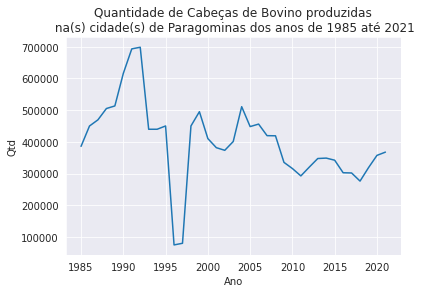

In [14]:
ax = sns.lineplot(x =  df_test['ano'], y = df_test['valor'])
ax.set_xlabel('Ano')
ax.set_ylabel('Qtd')

ax.set_title(f'Quantidade de {metrica} de {produto} produzidas\n na(s) cidade(s) de {cidade} dos anos de {int(df_test.ano.min())} até {int(df_test.ano.max())}')

In [15]:
# Tirar cidade n/ pará
# Coluna produto/cobertura - Dados mapbiomas, Métrica hectares
# Adiciona MapBiomas
# Ajuste de gráficos
# Filtrar diversas dimensionalidades geográficas
# Incluir estatística descritivas de acordo com dados geográficos